<a href="https://colab.research.google.com/github/codescaco/Classificacao_Iris_KNN/blob/main/Iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Flores Iris Utilizando o Algoritmo K Nearest Neighbor (KNN)

Este notebook apresenta uma implementação do algoritmo de K Nearest Neighbor (KNN) para a classificação de Flores Iris. O conjunto de dados Iris é um dos mais conhecidos conjuntos de dados na comunidade de machine learning e contém informações sobre três espécies de flores Iris: Iris setosa, Iris versicolor e Iris virginica. Para cada flor, quatro características foram medidas: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

O objetivo deste notebook é construir um modelo de classificação que, dada as medidas de uma flor, seja capaz de predizer a espécie da flor. Utilizaremos o algoritmo KNN, que é um método simples e eficaz para problemas de classificação.

#Importação das Bibliotecas necessárias

In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn as nn
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.neighbors import KNeighborsClassifier

# Carregamento e Exploração dos Dados

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Iris/iris.csv')

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.columns = ['Comprimento_Sepala', 'Largura_Sepala', 'Comprimento_Petala', 'Largura_Petala', 'Especie']
df.head()

,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala,Especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# Remoção da Coluna ID

#df = df.drop("Id", axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comprimento_Sepala  150 non-null    float64
 1   Largura_Sepala      150 non-null    float64
 2   Comprimento_Petala  150 non-null    float64
 3   Largura_Petala      150 non-null    float64
 4   Especie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
# Remoção de valores duplicados:

df.drop_duplicates(inplace=True)

df.duplicated().value_counts()

False    147
Name: count, dtype: int64

In [27]:
# Checagem de valores nulos:

df.isnull().value_counts()

Comprimento_Sepala  Largura_Sepala  Comprimento_Petala  Largura_Petala  Especie
False               False           False               False           False      147
Name: count, dtype: int64

# Gráficos para Visualização dos Dados

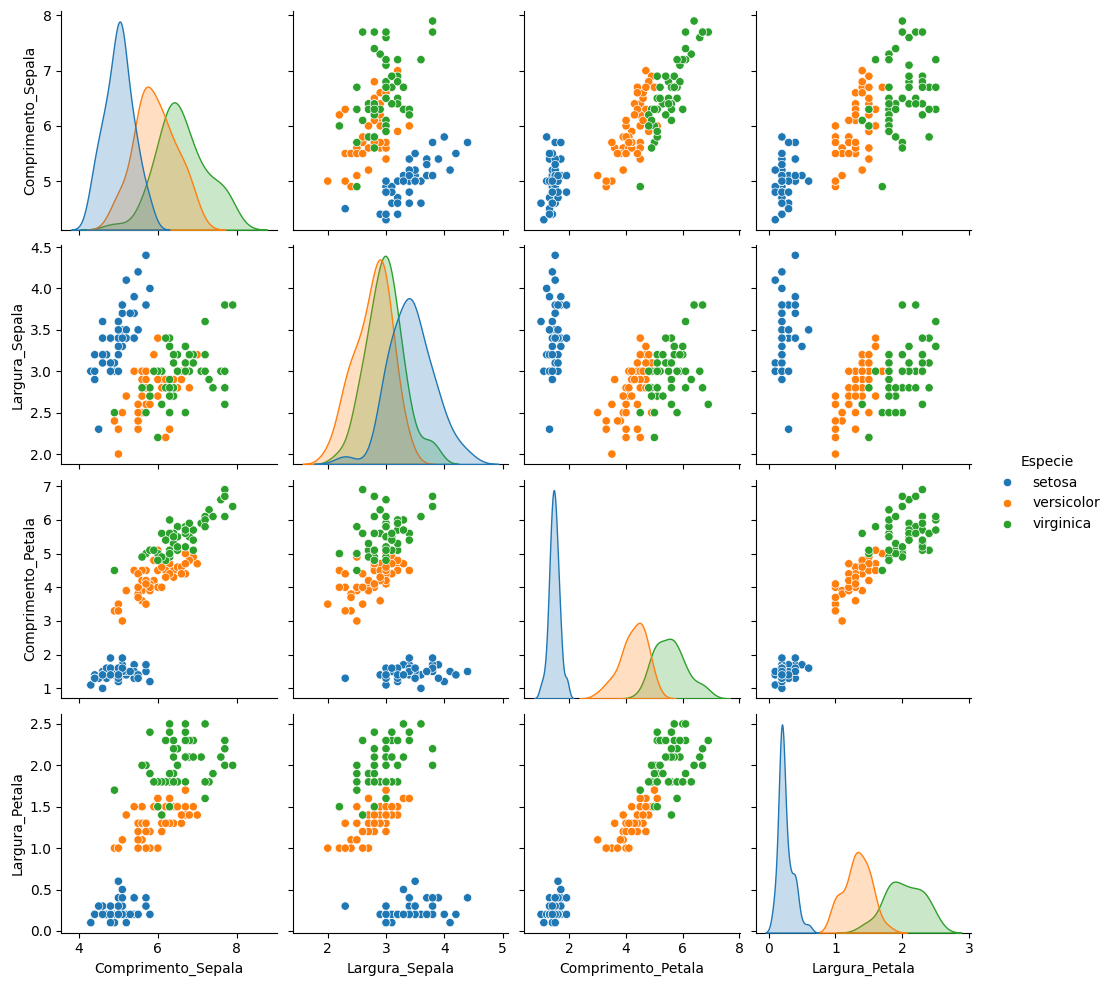

In [34]:
# Plotagem de Gráficos para Visualização

sns.pairplot(data=df, hue='Especie')

<Axes: xlabel='Comprimento_Sepala', ylabel='Largura_Petala'>

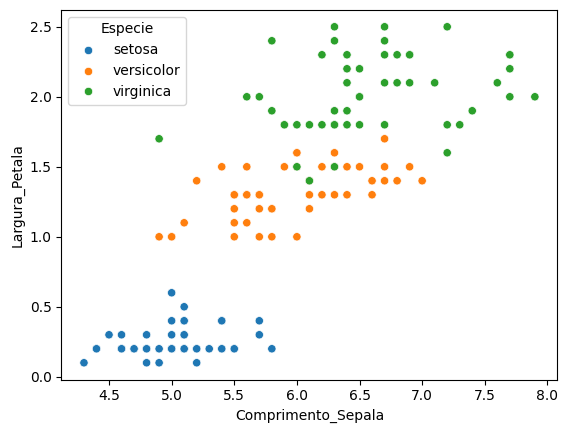

In [32]:
# Plotagem do Gráfico de Disperção

sns.scatterplot(data=df, x='Comprimento_Sepala', y='Largura_Petala', hue='Especie')

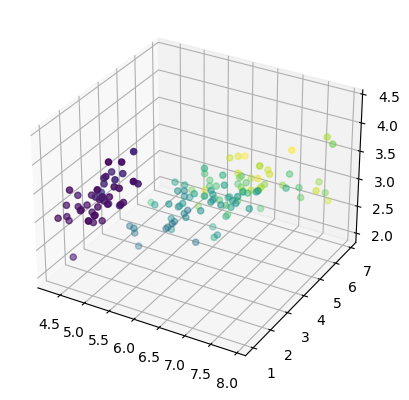

In [39]:
# Plotagem 3D:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Comprimento_Sepala'],df['Comprimento_Petala'], df['Largura_Sepala'], c=df['Largura_Petala'])

In [47]:
# One Hot Encoding:

df['Especie'].replace(['setosa', 'versicolor', 'virginica'], [0,1,2], inplace=True)

In [48]:
df.head()

,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Largura_Petala,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

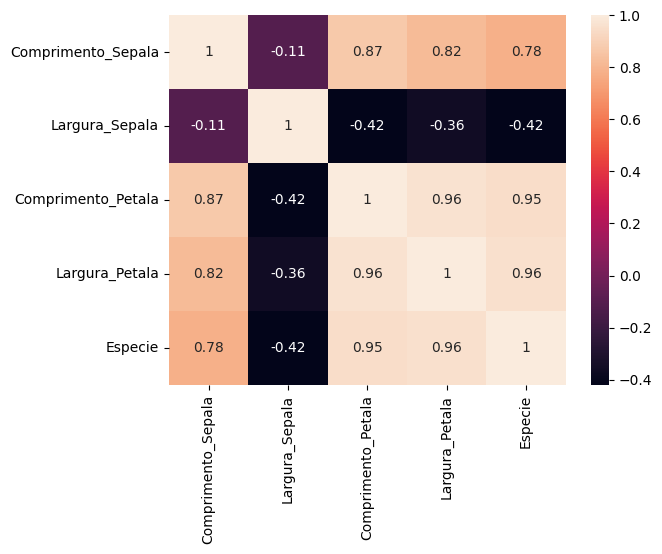

In [49]:
# Mapa de Calor:

sns.heatmap(df.corr(), annot=True)

#Preparação dos Dados

In [50]:
# Separação de Features e Labels:

X = df.drop('Especie', axis=1).values

y = df['Especie'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [51]:
#Dimensionando dados, apenas os dados de treino são dimensionados, ajustados e transformados. Os dados de teste são transformados apenas para evitar vazamento de informações:

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [76]:
# Inicialização do KNN:

knn_model = KNeighborsClassifier(n_neighbors=5) # Escolhendo aleatoriamente o neighbor como 5.

In [77]:
# Ajustando o modelo aos dados dimensionados:

knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [78]:
# Predições:

y_pred = knn_model.predict(scaled_X_test)

In [79]:
# Métricas de desempenho e avaliação:

accuracy_score(y_test, y_pred)*100

96.66666666666667

In [80]:
# Matriz de Confusão

confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Alcançamos 97% de precisão.